In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Dataset2C-20230503T185104Z-001.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


Tahap pertama yaitu meload data zip yang diberikan, saya menggunakan teknik seperti diatas.

In [ ]:
import warnings
import os

warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/Dataset2C')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/Dataset2C"))
file_count = len(files)
# print(file_count)

['batik-parang', 'batik-priangan', 'batik-lasem', 'batik-pekalongan', 'batik-megamendung']


Disini terlihat bahwa path data sudah ditemukan dikarenakan nama folder sudah bisa kita lihat seperti diatas<br><br>
**EDA**

In [ ]:
# Make new base directory
original_dataset_dir = '/content/Dataset2C'
base_dir = '/content/batik-data/'
os.mkdir(base_dir)

pembuatan base directory baru yang nantinya akan menyimpan dataset

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

Pembuatan 2 volder baru yaitu train dan validation dalam base directory yang nanti akan menampung hasil spliting dari dataset

In [ ]:
#Under train folder create five folders
#'batik-priangan', 'batik-megamendung', 'batik-parang', 'batik-lasem', 'batik-pekalongan'

train_priangan_dir = os.path.join(train_dir, 'batik-priangan')
os.mkdir(train_priangan_dir)

train_megamendung_dir = os.path.join(train_dir, 'batik-megamendung')
os.mkdir(train_megamendung_dir)

train_parang_dir = os.path.join(train_dir, 'batik-parang')
os.mkdir(train_parang_dir)

train_lasem_dir = os.path.join(train_dir, 'batik-lasem')
os.mkdir(train_lasem_dir)

train_pekalongan_dir = os.path.join(train_dir, 'batik-pekalongan')
os.mkdir(train_pekalongan_dir)

#Under validation folder create five folders
#'batik-priangan', 'batik-megamendung', 'batik-parang', 'batik-lasem', 'batik-pekalongan'

validation_priangan_dir = os.path.join(validation_dir, 'batik-priangan')
os.mkdir(validation_priangan_dir)

validation_megamendung_dir = os.path.join(validation_dir, 'batik-megamendung')
os.mkdir(validation_megamendung_dir)

validation_parang_dir = os.path.join(validation_dir, 'batik-parang')
os.mkdir(validation_parang_dir)

validation_lasem_dir = os.path.join(validation_dir, 'batik-lasem')
os.mkdir(validation_lasem_dir)

validation_pekalongan_dir = os.path.join(validation_dir, 'batik-pekalongan')
os.mkdir(validation_pekalongan_dir)

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

Fungsi ini adalah fungsi yang digunakan untuk melakukan spliting dari dataset menjadi training dan validation/testing

In [ ]:
# priangan,megamendung,parang,lasem,pekalongan

priangan_SOURCE_DIR = '/content/Dataset2C/batik-priangan/'
TRAINING_priangan_DIR = '/content/batik-data/train/batik-priangan/'
VALID_priangan_DIR = '/content/batik-data/validation/batik-priangan/'

megamendung_SOURCE_DIR = '/content/Dataset2C/batik-megamendung/'
TRAINING_megamendung_DIR = '/content/batik-data/train/batik-megamendung/'
VALID_megamendung_DIR = '/content/batik-data/validation/batik-megamendung/'

parang_SOURCE_DIR = '/content/Dataset2C/batik-parang/'
TRAINING_parang_DIR = '/content/batik-data/train/batik-parang/'
VALID_parang_DIR = '/content/batik-data/validation/batik-parang/'

lasem_SOURCE_DIR = '/content/Dataset2C/batik-lasem/'
TRAINING_lasem_DIR = '/content/batik-data/train/batik-lasem/'
VALID_lasem_DIR = '/content/batik-data/validation/batik-lasem/'

pekalongan_SOURCE_DIR = '/content/Dataset2C/batik-pekalongan/'
TRAINING_pekalongan_DIR = '/content/batik-data/train/batik-pekalongan/'
VALID_pekalongan_DIR = '/content/batik-data/validation/batik-pekalongan/'

Membuat variabel yang menampung directory source, training, dan validation

In [ ]:

import os
import random
from shutil import copyfile

split_size = 0.80

split_data(priangan_SOURCE_DIR, TRAINING_priangan_DIR, VALID_priangan_DIR, split_size)
split_data(megamendung_SOURCE_DIR, TRAINING_megamendung_DIR, VALID_megamendung_DIR, split_size)
split_data(parang_SOURCE_DIR, TRAINING_parang_DIR, VALID_parang_DIR, split_size)
split_data(lasem_SOURCE_DIR, TRAINING_lasem_DIR, VALID_lasem_DIR, split_size)
split_data(pekalongan_SOURCE_DIR, TRAINING_pekalongan_DIR, VALID_pekalongan_DIR, split_size)

Disini adalah proses spliting dimana 80% digunakan training dan sisanya digunakan untuk validation/testing

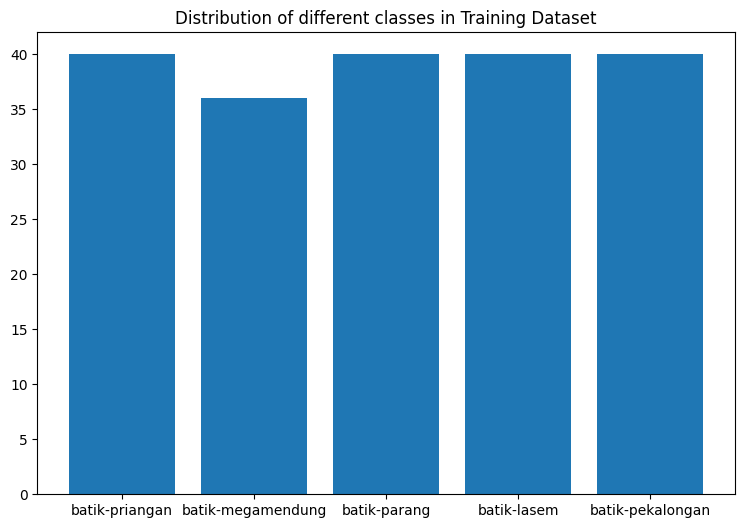

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
#priangan,megamendung,parang,lasem,pekalongan
image_folder = ['batik-priangan', 'batik-megamendung', 'batik-parang', 'batik-lasem', 'batik-pekalongan']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/batik-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

BARPLOT diatas merepresentasikan distribusi dari data yang sudah masuk dalam training data

In [ ]:
for i in ['batik-priangan', 'batik-megamendung', 'batik-parang', 'batik-lasem', 'batik-pekalongan']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/batik-data/train/'+i+'/'))))

Training batik-priangan images are: 40
Training batik-megamendung images are: 36
Training batik-parang images are: 40
Training batik-lasem images are: 40
Training batik-pekalongan images are: 40


Pembuatan Histogram untuk merepresentasikan distribusi dari grayscale pada gambar pertama dari folder batik-pariangan

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x178 at 0x7F1DBCE321A0>


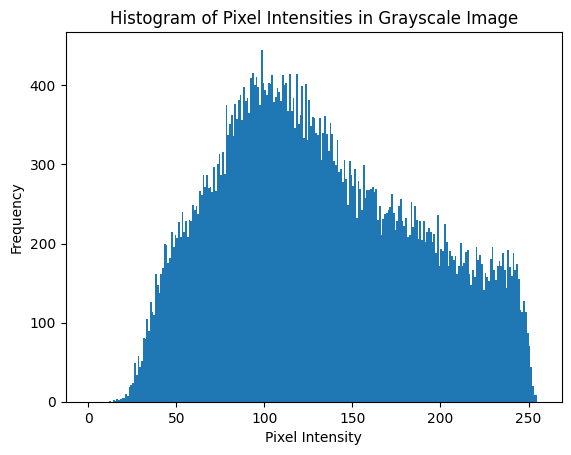

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('/content/batik-data/train/batik-priangan/1.jpg')
print(img)
gray_img = img.convert('L')

# Convert the grayscale image to a numpy array
gray_arr = np.array(gray_img)

# Plot the histogram of pixel intensities
plt.hist(gray_arr.ravel(), bins=256, range=(0, 256))
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities in Grayscale Image')
plt.show()

#CNN

In [ ]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#size 64x64
img_width=64; img_height=64
batch_size=16

Cell diatas menunjukan penggantian nilai size menjadi 64*64, penginisialisasian batch size, dan juga importan library yang akan digunakan

In [ ]:
TRAINING_DIR = '/content/batik-data/train/'
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 196 images belonging to 5 classes.


menginisialisasi objek train_datagen sebagai generator data gambar untuk (training data). train_generator nantinya dapat digunakan sebagai input data training pada saat pemodelan CNN.

In [ ]:
VALIDATION_DIR = '/content/batik-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen.apply_transform

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width))

Found 50 images belonging to 5 classes.


menginisialisasi objek validation_datagen sebagai generator data gambar untuk (validation/test data). validation_generator nantinya dapat digunakan sebagai input data testing pada saat pemodelan CNN.

Pembuatan model convolusi dari soal 2c

In [ ]:
model2c = Sequential([
    Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(img_height,img_width,3)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(2,2), activation='relu', padding="valid"),
    Conv2D(filters=384, kernel_size=(3,3), strides=(2,2), activation='relu', padding="valid"),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(5, activation='softmax')
])
model2c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       409856    
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1327488   
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 192)       663744    
                                                                 
 flatten (Flatten)           (None, 32448)             0         
                                                                 
 dense (Dense)               (None, 4096)              1

Output summary dari model dengan menggunakan info parameter kernel size, filter yang sesuai dengan gambar pada soal, namun output shape nya tidak sesuai dengan yang ada seperti pada gambar yang diberikan padahal informasi parameter sudah sesuai.
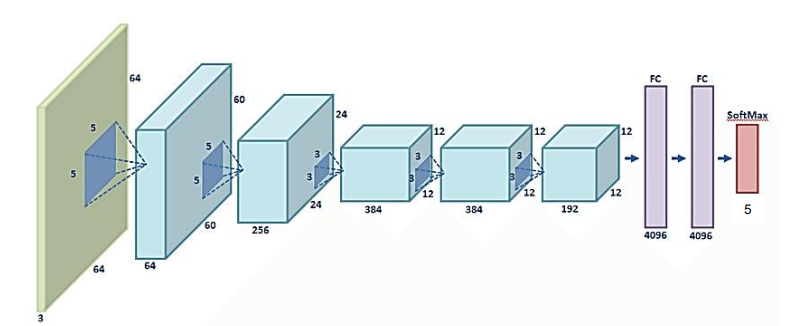<br>
Untuk mendapat shape yang sesuai saya akan melakukan tunning hyperparameter sejalan dengan permintaan soal nomor 2d.

In [ ]:
model2c_shape = Sequential([
    Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(img_height,img_width,3)),
    Conv2D(filters=256, kernel_size=(14,14), strides=(2,2), activation='relu', padding="valid"),
    Conv2D(filters=384, kernel_size=(2,2), strides=(2,2), activation='relu', padding="valid"),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(5, activation='softmax')
])
model2c_shape.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        4864      
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 256)       3211520   
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 384)       393600    
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 384)       1327488   
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 192)       663744    
                                                                 
 flatten_1 (Flatten)         (None, 27648)             0         
                                                                 
 dense_3 (Dense)             (None, 4096)             

Terlihat bahwa output shape sudah sesuai seperti yang ada pada gambar arsitektur yang diberikan. Namun untuk proses selanjutnya yang berhubungan dengan nomor 2c saya tidak  menggunakan model ini karena parameternya sudah berubah dan tidak sesuai pada soal.

In [ ]:
model2c.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])

penggunaan metrics accuracy agar nanti bisa dilakukan komparasi dengan model 2d

In [ ]:
history = model2c.fit_generator(train_generator,epochs=3,verbose=1,validation_data=validation_generator)

acc2c=history.history['accuracy']
print("accuracy model 2c: ",acc2c)

Epoch 1/3
13/13 [==============================] - 66s 5s/step - loss: 1.7651 - accuracy: 0.1837 - val_loss: 1.6101 - val_accuracy: 0.2000
Epoch 2/3
13/13 [==============================] - 64s 5s/step - loss: 1.6117 - accuracy: 0.1990 - val_loss: 1.6100 - val_accuracy: 0.2000
Epoch 3/3
13/13 [==============================] - 62s 5s/step - loss: 1.6114 - accuracy: 0.2041 - val_loss: 1.6104 - val_accuracy: 0.2000
accuracy model 2c:  [0.18367347121238708, 0.19897958636283875, 0.20408163964748383]


TUNNING HYPERPARAMETER for better accuracy

In [ ]:

from tensorflow.keras.layers import Dropout, BatchNormalization

#mengganti kernel size dan filter sesuai dengan alexnet pada umumnya dan menambahkan batch normalisation setelah tahap konvolusi
#and menggunakan dropout pada fullyconncted layer

model2d = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), activation='relu', input_shape=(img_height,img_width,3)),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(5,5), strides=(2,2), activation='relu', padding="valid"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(2,2), activation='relu', padding="valid"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.3),
    Dense(4096, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])
model2d.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 256)      1024      
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 384)       885120    
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 384)     

saya melakukan tunning dengan mengganti kernel size dan filter sesuai dengan alexnet pada umumnya, menambahkan batch normalization setelah tahap konvolusi, dan menggunakan dropout pada fullyconncted layer. Alasan:<br>
- Dengan mengganti kernel size dan filter sesuai dengan alexnet, dapat mengadaptasi arsitektur cnn yang telah terbukti efektif untuk mengekstraksi fitur dari gambar.
- Dengan menambahkan batch normalization setelah tahap konvolusi,  dapat meningkatkan performa cnn dengan mempercepat konvergensi dan mencegah gradien menghilang atau meledak.
- Dengan menggunakan dropout pada fully connected layer, dapat meningkatkan akurasi cnn dengan menghindari overfitting dan memaksa model untuk belajar fitur yang lebih robust.

In [ ]:
model2d.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [ ]:
history2 = model2d.fit_generator(train_generator,epochs=5,verbose=1,validation_data=validation_generator)

acc2d=history2.history['accuracy']
print("accuracy model 2c: ", acc2c)
print("accuracy model 2d: ", acc2d)


Epoch 1/5
13/13 [==============================] - 82s 6s/step - loss: 30.5523 - accuracy: 0.3010 - val_loss: 167.7530 - val_accuracy: 0.2000
Epoch 2/5
13/13 [==============================] - 78s 6s/step - loss: 23.2748 - accuracy: 0.3010 - val_loss: 1988.4801 - val_accuracy: 0.2000
Epoch 3/5
13/13 [==============================] - 79s 6s/step - loss: 12.4570 - accuracy: 0.3061 - val_loss: 1234.6703 - val_accuracy: 0.2000
Epoch 4/5
13/13 [==============================] - 79s 6s/step - loss: 13.3428 - accuracy: 0.3061 - val_loss: 669.6649 - val_accuracy: 0.1800
Epoch 5/5
13/13 [==============================] - 78s 6s/step - loss: 8.3324 - accuracy: 0.3367 - val_loss: 155.4319 - val_accuracy: 0.2200
accuracy model 2c:  [0.18367347121238708, 0.19897958636283875, 0.20408163964748383]
accuracy model 2d:  [0.30102041363716125, 0.30102041363716125, 0.30612245202064514, 0.30612245202064514, 0.33673468232154846]


Pada hasil diatas terlihat accuracy pada model yang ditunning (1d) meningkat walaupun tidak signifikan, hal ini menandakan bahwa dengan melakukan tunning dengan benar dapat meningkatkan performa dari model.

#Evaluasi membandingkan nilai prediksi dengan nilai ground truth pada testing set

In [ ]:
#model2d.load_weights() # memuat bobot terbaik yang disimpan oleh model checkpoint
y_pred = model2d.predict(validation_generator) # menghasilkan prediksi berupa array numpy yang berisi probabilitas kelas untuk setiap gambar pada testing set
y_predict = np.argmax(y_pred, axis=1) # mendapatkan indeks kelas dengan probabilitas tertinggi sebagai prediksi akhir


4/4 [==============================] - 3s 561ms/step


Disini adalah proses untuk mengambil nilai dari predicted value yang diberikan oleh model. Dan untuk melakukan evaluasi, saya menggunakan data yang ada pada testing/validation true data sebagai perbandingan dengan hasil predicted model dari testing/validation

In [ ]:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(train_generator, y_predict)
# print("Mean Squared Error: ", mse)
import keras
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import DirectoryIterator



dir_iter = keras.preprocessing.image.DirectoryIterator('/content/batik-data/validation',validation_datagen)
y_true = dir_iter.labels

print("True value:",y_true)
print("Predicted value:",y_predict)

Found 50 images belonging to 5 classes.
True value: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4]
Predicted value: [4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 1 4 4 4
 4 4 4 4 4 4 1 4 4 4 4 4 4]


In [ ]:
from sklearn.metrics import classification_report

print("Evaluation report: \n", classification_report(y_true, y_predict))

Evaluation report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.25      0.10      0.14        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.20      0.90      0.32        10

    accuracy                           0.20        50
   macro avg       0.09      0.20      0.09        50
weighted avg       0.09      0.20      0.09        50



Dari laporan ini,  menunjukkan bahwa model memiliki akurasi yang rendah, yaitu hanya 20%, yang berarti hanya 10 dari 50 prediksi yang tepat, kita dapat melihat bahwa model memiliki kinerja yang buruk dalam memprediksi kelas, terutama kelas 0, 2, dan 3 yang memiliki metrik nol. Model juga cenderung memprediksi data sebagai kelas 4, karena memiliki recall tertinggi (0.90) tetapi precision terendah (0.20) Model ini mungkin overfitting atau underfitting atau tidak cocok untuk data ini.